# Multi-Variable Linear Regression

Like single-variable linear regression, but with multiple values of $x$:

i.e.

$$y_j = \sum_{i=0}^n x_{ji} m_i$$

In each case, $x_0 = 0$, giving a bias term.

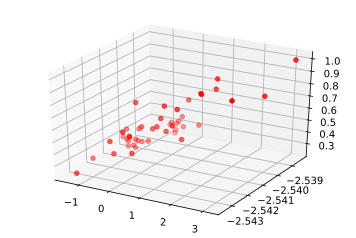

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

dimensions = 2

# Load example data

# Normalise data using the mean and std deviation to prevent errors
# from blowing up
if dimensions == 1:
    x, y = np.loadtxt('ex1data1.txt', delimiter=',', unpack=True)
    x = (x.reshape((len(x), 1)) - np.mean(x)) / np.std(x)
    y /= np.max(y)
    
    plt.scatter(x, y)
    plt.show()
elif dimensions == 2:
    x, x1, y = np.loadtxt('ex1data2.txt', delimiter=',', unpack=True)
    x = (np.array([x, x1]).transpose() - np.mean(x)) / np.std(x)
    y /= np.max(y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0], x[:,1], y, c='r', marker='o')
    plt.show()

Excitingly, because numpy can quite happily deal with vectors in all of the places we used scalars previously, we can just reuse the code from before.

In [2]:
def sq_error(x, y_expected, m, c):
    """
    Δy = (y_expected - (mx + c))^2
    """
    
    return np.mean((y_expected - (x @ m + c).reshape((1, -1)))**2)

## Gradient Descent

Given a learning rate $\epsilon$, we can compute new values for $m$ and $c$ from the following equations:

$$ nE = \sum_{i=0}^n (x_i \cdot m + c - y_i)^2 $$

$$ n\frac{\partial E}{\partial m} = \sum_{i=0}^n 2(x_i \cdot m + c - y_i)x_i$$
$$ n\frac{\partial E}{\partial c} = \sum_{i=0}^n 2(x_i \cdot m + c - y_i)$$

$$m' = m + \epsilon \frac{\partial E}{\partial m}$$
$$c' = c + \epsilon \frac{\partial E}{\partial c}$$

In [3]:
def gradient_m(x, y, m, c):
    y = y.reshape(-1, 1)
    y_est = x @ m + c
    del_m = x.T @ (y_est - y)
    
    return del_m / len(x)

def gradient_c(x, y, m, c):
    y = y.reshape(-1, 1)
    y_est = x @ m + c
    
    return np.mean(y_est - y)

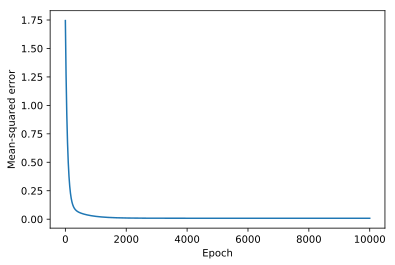

In [4]:
epochs = 10000
errors = []

m = np.random.random((dimensions,1))
c = np.random.random((1, 1))

errors.append(sq_error(x, y, m, c))

for _ in range(epochs):    
    dm = gradient_m(x, y, m, c)
    dc = gradient_c(x, y, m, c)

    step = 1E-3
    
    # go down the hill
    m -= step * dm
    c -= step * dc
    
    errors.append(sq_error(x, y, m, c))

plt.xlabel('Epoch')
plt.ylabel('Mean-squared error')
plt.plot(errors)
plt.show()

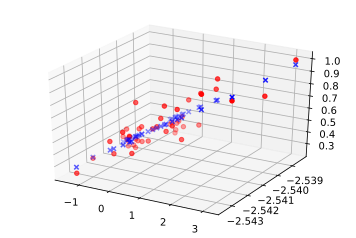

In [5]:
if dimensions == 1:
    plt.scatter(x, y)
    plt.plot([np.min(x), np.max(x)], [np.min(x) * m[0] + c.flatten(), np.max(x) * m[0] + c.flatten()])
elif dimensions == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0], x[:,1], y, c='r', marker='o')

    zs = x @ m + c

    ax.scatter(x[:,0], x[:,1], zs, c='b', marker='x')

    plt.show()

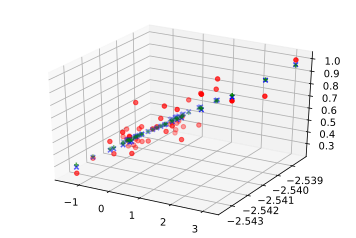

In [6]:
# Check against sklearn's implementation of multiple linear regression,
# since Numpy doesn't implement it

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x, y)

if dimensions == 1:
    plt.scatter(x, y)
    plt.plot([np.min(x), np.max(x)], [np.min(x) * m[0] + c.flatten(), np.max(x) * m[0] + c.flatten()])
    plt.plot([np.min(x), np.max(x)], [np.min(x) * reg.coef_[0] + reg.intercept_, np.max(x) * reg.coef_[0] + reg.intercept_])
elif dimensions == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0], x[:,1], y, c='r', marker='o')

    z_pred = x @ m + c

    ax.scatter(x[:,0], x[:,1], z_pred, c='b', marker='x')
    
    z_sk = x @ reg.coef_ + reg.intercept_
    ax.scatter(x[:,0], x[:,1], z_sk, c='g', marker='+')

    plt.show()